<a href="https://colab.research.google.com/github/Mnikito/INTRO_ML/blob/main/HW3/4105_HW3_FULL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import sklearn

seed = 9

### Problem 1

In [2]:
from sklearn.datasets import load_breast_cancer 

In [3]:
# Load Cancer Dataset and get ready for processing
breast = load_breast_cancer() 

breast_data = breast.data 

breast_labels = breast.target 
labels = np.reshape(breast_labels,(569,1)) 

final_breast_data = np.concatenate([breast_data,labels],axis=1) 
breast_dataset = pd.DataFrame(final_breast_data) 

features = breast.feature_names 
features_labels = np.append(features,'label') 


breast_dataset.columns = features_labels 

#breast_dataset['label'].replace(0, 'Benign',inplace=True) 
#breast_dataset['label'].replace(1, 'Malignant',inplace=True) 

#breast_dataset.tail() 

# Preprocessing
y = breast_dataset.pop('label')

X = breast_dataset.copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=seed)

# Standarizing Dataset

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)

X_test_std = sc.fit_transform(X_test)


In [4]:
# Naive Bayes Model

classifier = GaussianNB()
classifier.fit(X_train_std, y_train)


expected = y_test
predicted = classifier.predict(X_test_std)

#Summarize model fit
print(metrics.classification_report(expected,predicted))
print("\n=================\nConfusion Matrix:\n")
print(metrics.confusion_matrix(y_test, predicted))
print("\n\n")
print("Accuracy:",metrics.accuracy_score(y_test, predicted)) 
print("Precision:",metrics.precision_score(y_test, predicted)) 
print("Recall:",metrics.recall_score(y_test, predicted)) 

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93        40
         1.0       0.97      0.95      0.96        74

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix:

[[38  2]
 [ 4 70]]



Accuracy: 0.9473684210526315
Precision: 0.9722222222222222
Recall: 0.9459459459459459


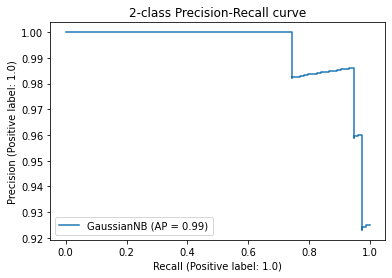

In [5]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test_std, y_test, name="GaussianNB"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

### Problem 2

Using this link:
https://dwbi1.wordpress.com/2021/04/16/logistic-regression-with-pca-in-python/

In [41]:
from sklearn.linear_model import LogisticRegression

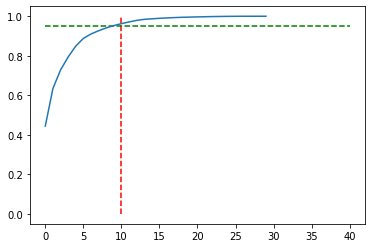

In [45]:
from sklearn.decomposition import PCA
pca = PCA(random_state=88)
pca.fit(X_train_std)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.vlines(x=10, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=40, xmin=0, colors="g", linestyles="--")
plt.plot(explained_variance)

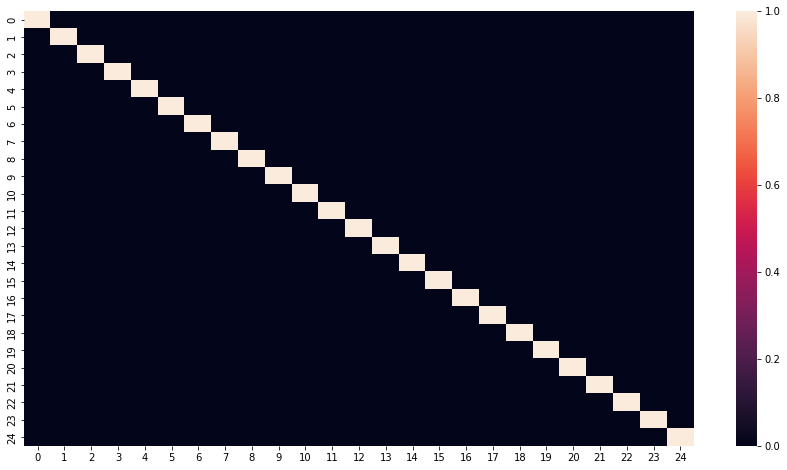

In [47]:
pca_final = PCA(n_components=25)
df_train_pca = pca_final.fit_transform(X_train_std)

corr_mat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=[15,8])
sns.heatmap(corr_mat)
plt.show()

In [68]:
# Train the PCA model 

acc = []
prec = []
rec = []
kk =[]

for k in range(1,30):
  pca_final = PCA(n_components=k, svd_solver = 'full')
  df_train_pca = pca_final.fit_transform(X_train_std)
  df_test_pca = pca_final.transform(X_test_std)

  df_train_pca_std = sc.fit_transform(df_train_pca)
  df_test_pca_std = sc.fit_transform(df_test_pca)

  # Train the Logistic Regression model
  LR_PCA_Learner = GaussianNB()
  #LR_PCA_Learner = LogisticRegression()
  LR_PCA_Model = LR_PCA_Learner.fit(df_train_pca_std, y_train)


  predicted = LR_PCA_Model.predict(df_test_pca)

  kk.append(k)
  acc.append(metrics.accuracy_score(y_test, predicted)) 
  prec.append(metrics.precision_score(y_test, predicted)) 
  rec.append(metrics.recall_score(y_test, predicted)) 

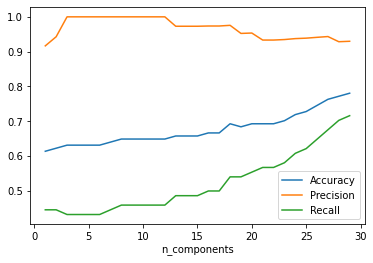

In [69]:
# Plot
plt.plot(kk,acc, label = "Accuracy")
plt.plot(kk,prec, label = "Precision")
plt.plot(kk,rec, label = "Recall")
plt.legend()
plt.xlabel("n_components")
plt.savefig("PCA_Plot.png")